# Task 7 : Hotel Booking Cancellation Analysis

A hotel chain wants to identify signs that can help foretell if guests are going to cancel their room bookings. By doing so, they can better anticipate the occurrence of such events and adjust their room prices and cancellation policies accordingly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Importation

Importion of the data and checking that everything is okay (no missing values, no strange data types, ...)

In [3]:
df = pd.read_csv('bookings.txt', delimiter=',')
df.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
0,City Hotel,February,9,21,1,0,2,BB,ESP,Online TA,TA/TO,A,A,0,No Deposit,Transient,91.0,0,1,1
1,City Hotel,July,29,17,1,0,2,SC,SWE,Online TA,TA/TO,A,A,0,No Deposit,Transient,140.0,0,2,1
2,City Hotel,July,29,22,1,1,2,HB,DEU,Offline TA/TO,TA/TO,A,A,0,No Deposit,Transient-Party,122.4,0,1,0
3,City Hotel,March,11,9,0,3,2,BB,USA,Online TA,TA/TO,B,B,0,No Deposit,Transient,77.5,0,2,1
4,City Hotel,September,38,11,1,0,2,SC,GBR,Online TA,TA/TO,A,A,0,No Deposit,Transient,89.0,0,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   arrival_date_month           5000 non-null   object 
 2   arrival_date_week_number     5000 non-null   int64  
 3   arrival_date_day_of_month    5000 non-null   int64  
 4   stays_in_weekend_nights      5000 non-null   int64  
 5   stays_in_week_nights         5000 non-null   int64  
 6   adults                       5000 non-null   int64  
 7   meal                         5000 non-null   object 
 8   country                      5000 non-null   object 
 9   market_segment               5000 non-null   object 
 10  distribution_channel         5000 non-null   object 
 11  reserved_room_type           5000 non-null   object 
 12  assigned_room_type           5000 non-null   object 
 13  booking_changes   

Some numerical variables may need to be transformed in object type to not have a biased ordinal interpretation of its values. 

### Proportion of cancellation in the dataset

In [5]:
proportion_of_cancellations = df['canceled'].value_counts()[1]/(df['canceled'].value_counts()[0]+df['canceled'].value_counts()[1])
proportion_of_cancellations

0.3652

In [6]:
df_non_refund = df[df['deposit_type'] == "Non Refund"]
df_non_refund.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
17,City Hotel,December,49,5,2,1,2,HB,ESP,Groups,TA/TO,A,A,0,Non Refund,Transient,90.0,0,0,1
32,City Hotel,July,28,6,2,4,1,BB,PRT,Offline TA/TO,TA/TO,A,A,0,Non Refund,Transient,110.0,0,0,1
33,City Hotel,April,17,26,0,3,2,BB,PRT,Groups,TA/TO,A,A,0,Non Refund,Transient,100.0,0,0,1
37,City Hotel,February,8,23,1,3,2,BB,PRT,Offline TA/TO,TA/TO,A,A,0,Non Refund,Transient,78.0,0,0,1
41,City Hotel,April,16,14,0,2,2,BB,PRT,Groups,TA/TO,A,A,0,Non Refund,Transient,62.0,0,0,1


In [7]:
prop_cancellation_nonrefund = df_non_refund['canceled'].value_counts()[1]/(df_non_refund['canceled'].value_counts()[0]+df_non_refund['canceled'].value_counts()[1])
prop_cancellation_nonrefund

0.9966666666666667

In [ ]:
# There seems to be a possible anomaly in the data: more than 99% of cases where the guarantee is not refunded after the reservation has been cancelled result in a cancellation.

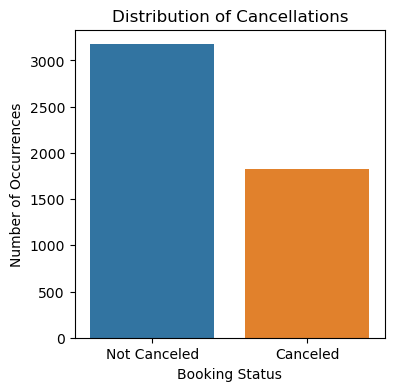

In [9]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='canceled')

plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title('Distribution of Cancellations')
plt.xlabel('Booking Status')
plt.ylabel('Number of Occurrences')
plt.show()

More than one third of cancellations is a lot, and it justifies this study as a complex problem to solve for the hotel company.

### Distributions of the variables in the dataset

In [10]:
df['booking_changes'].value_counts()

booking_changes
0     4265
1      506
2      168
3       30
4       15
5        9
6        3
7        2
18       1
8        1
Name: count, dtype: int64

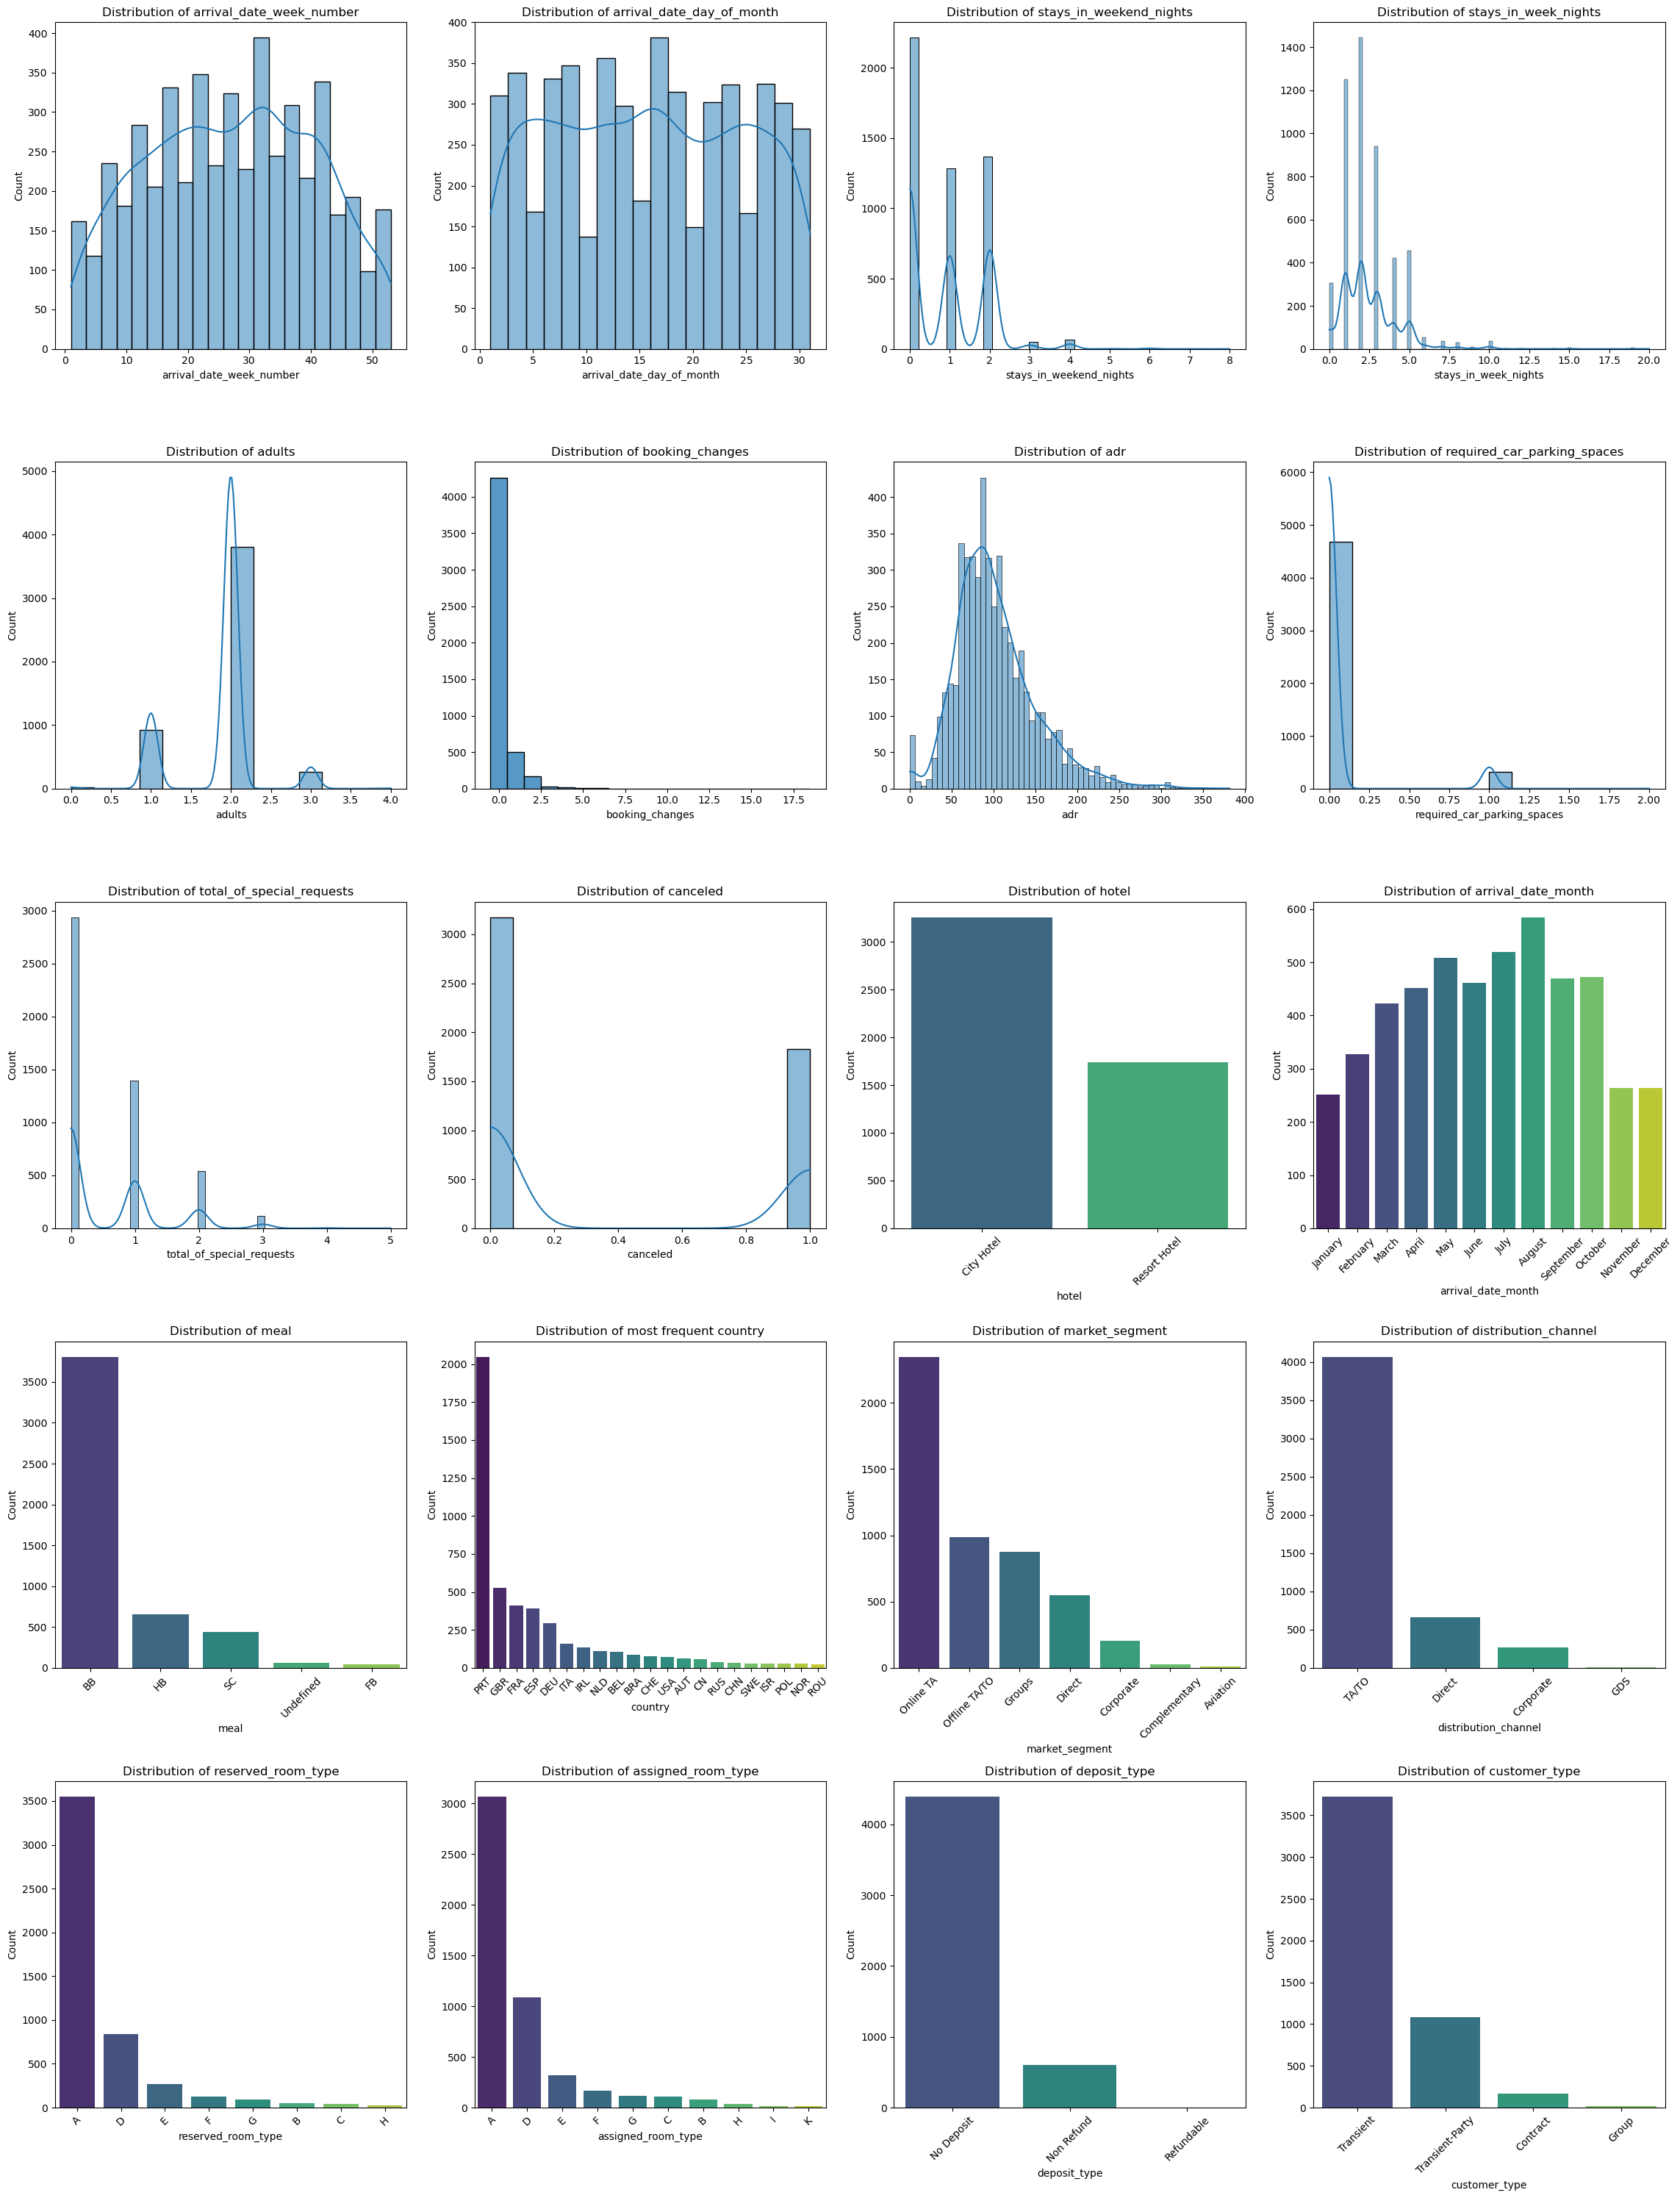

In [11]:
# Selection of numeric and object columns
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Multiple subplots creation (auto adaptable)
n_rows = (len(numerical_columns) + len(categorical_columns) + 1) // 4  
fig, axes = plt.subplots(n_rows, 4, figsize=(23, n_rows * 6))  

# Numerical Data (conditions for graphs that need ordinal x ax)
for i, col in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]  
    if col == 'booking_changes' : 
        unique_values = df['booking_changes'].nunique()
        sns.histplot(df[col], bins=unique_values, discrete=True, kde=False, ax=ax)
    else : 
        sns.histplot(df[col], kde=True, ax=ax)  
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Categorical Data
for j, col in enumerate(categorical_columns):
    ax = axes[(len(numerical_columns) + j) // 4, (len(numerical_columns) + j) % 4] 
    if col == 'arrival_date_month' :
        months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order=months_order)
        ax.set_title(f'Distribution of {col}')
    elif col == 'country' : 
        country_counts = df['country'].value_counts()
        filtered_countries = country_counts[country_counts > 20].index
        filtered_country = df[df['country'].isin(filtered_countries)]
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order=filtered_countries)
        ax.set_title(f'Distribution of most frequent {col}')
    else : 
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order = df[col].value_counts().index)  
        ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  


plt.tight_layout()
plt.show()

### Variables interactions

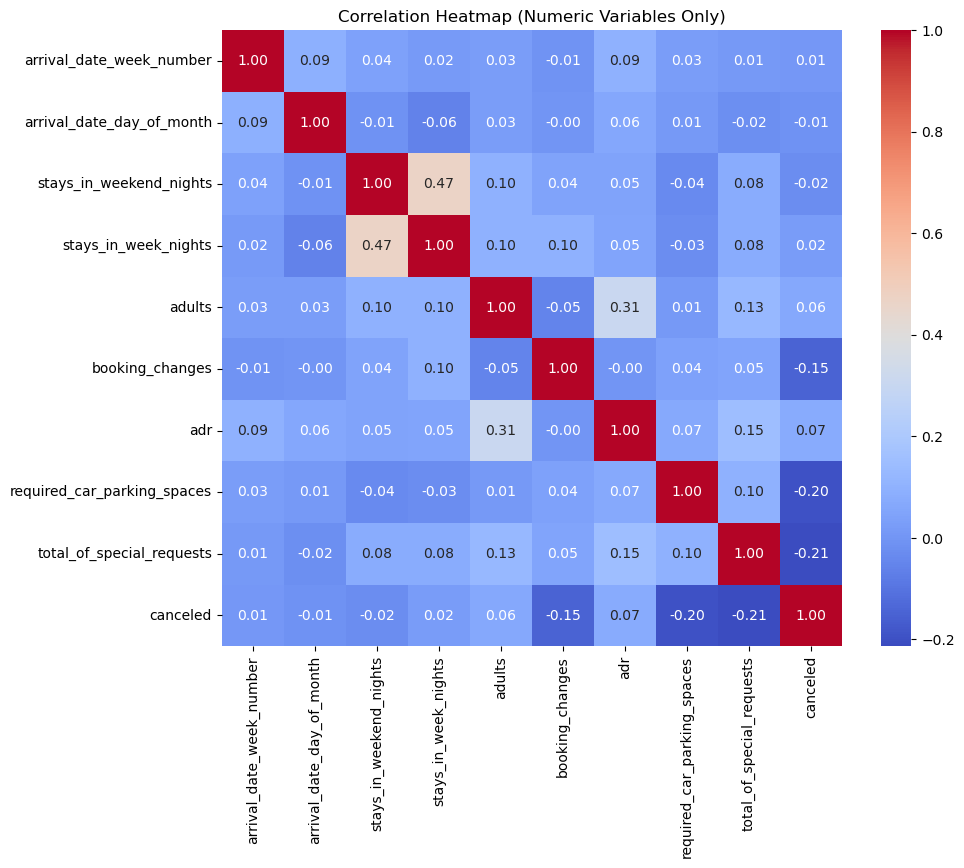

In [12]:
# First we can look at correlation between numerical data, before encoding the categorical data. It is not sufficient but give a quick first idea of possible strongly correlated covariates.
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

c:\Users\vadim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


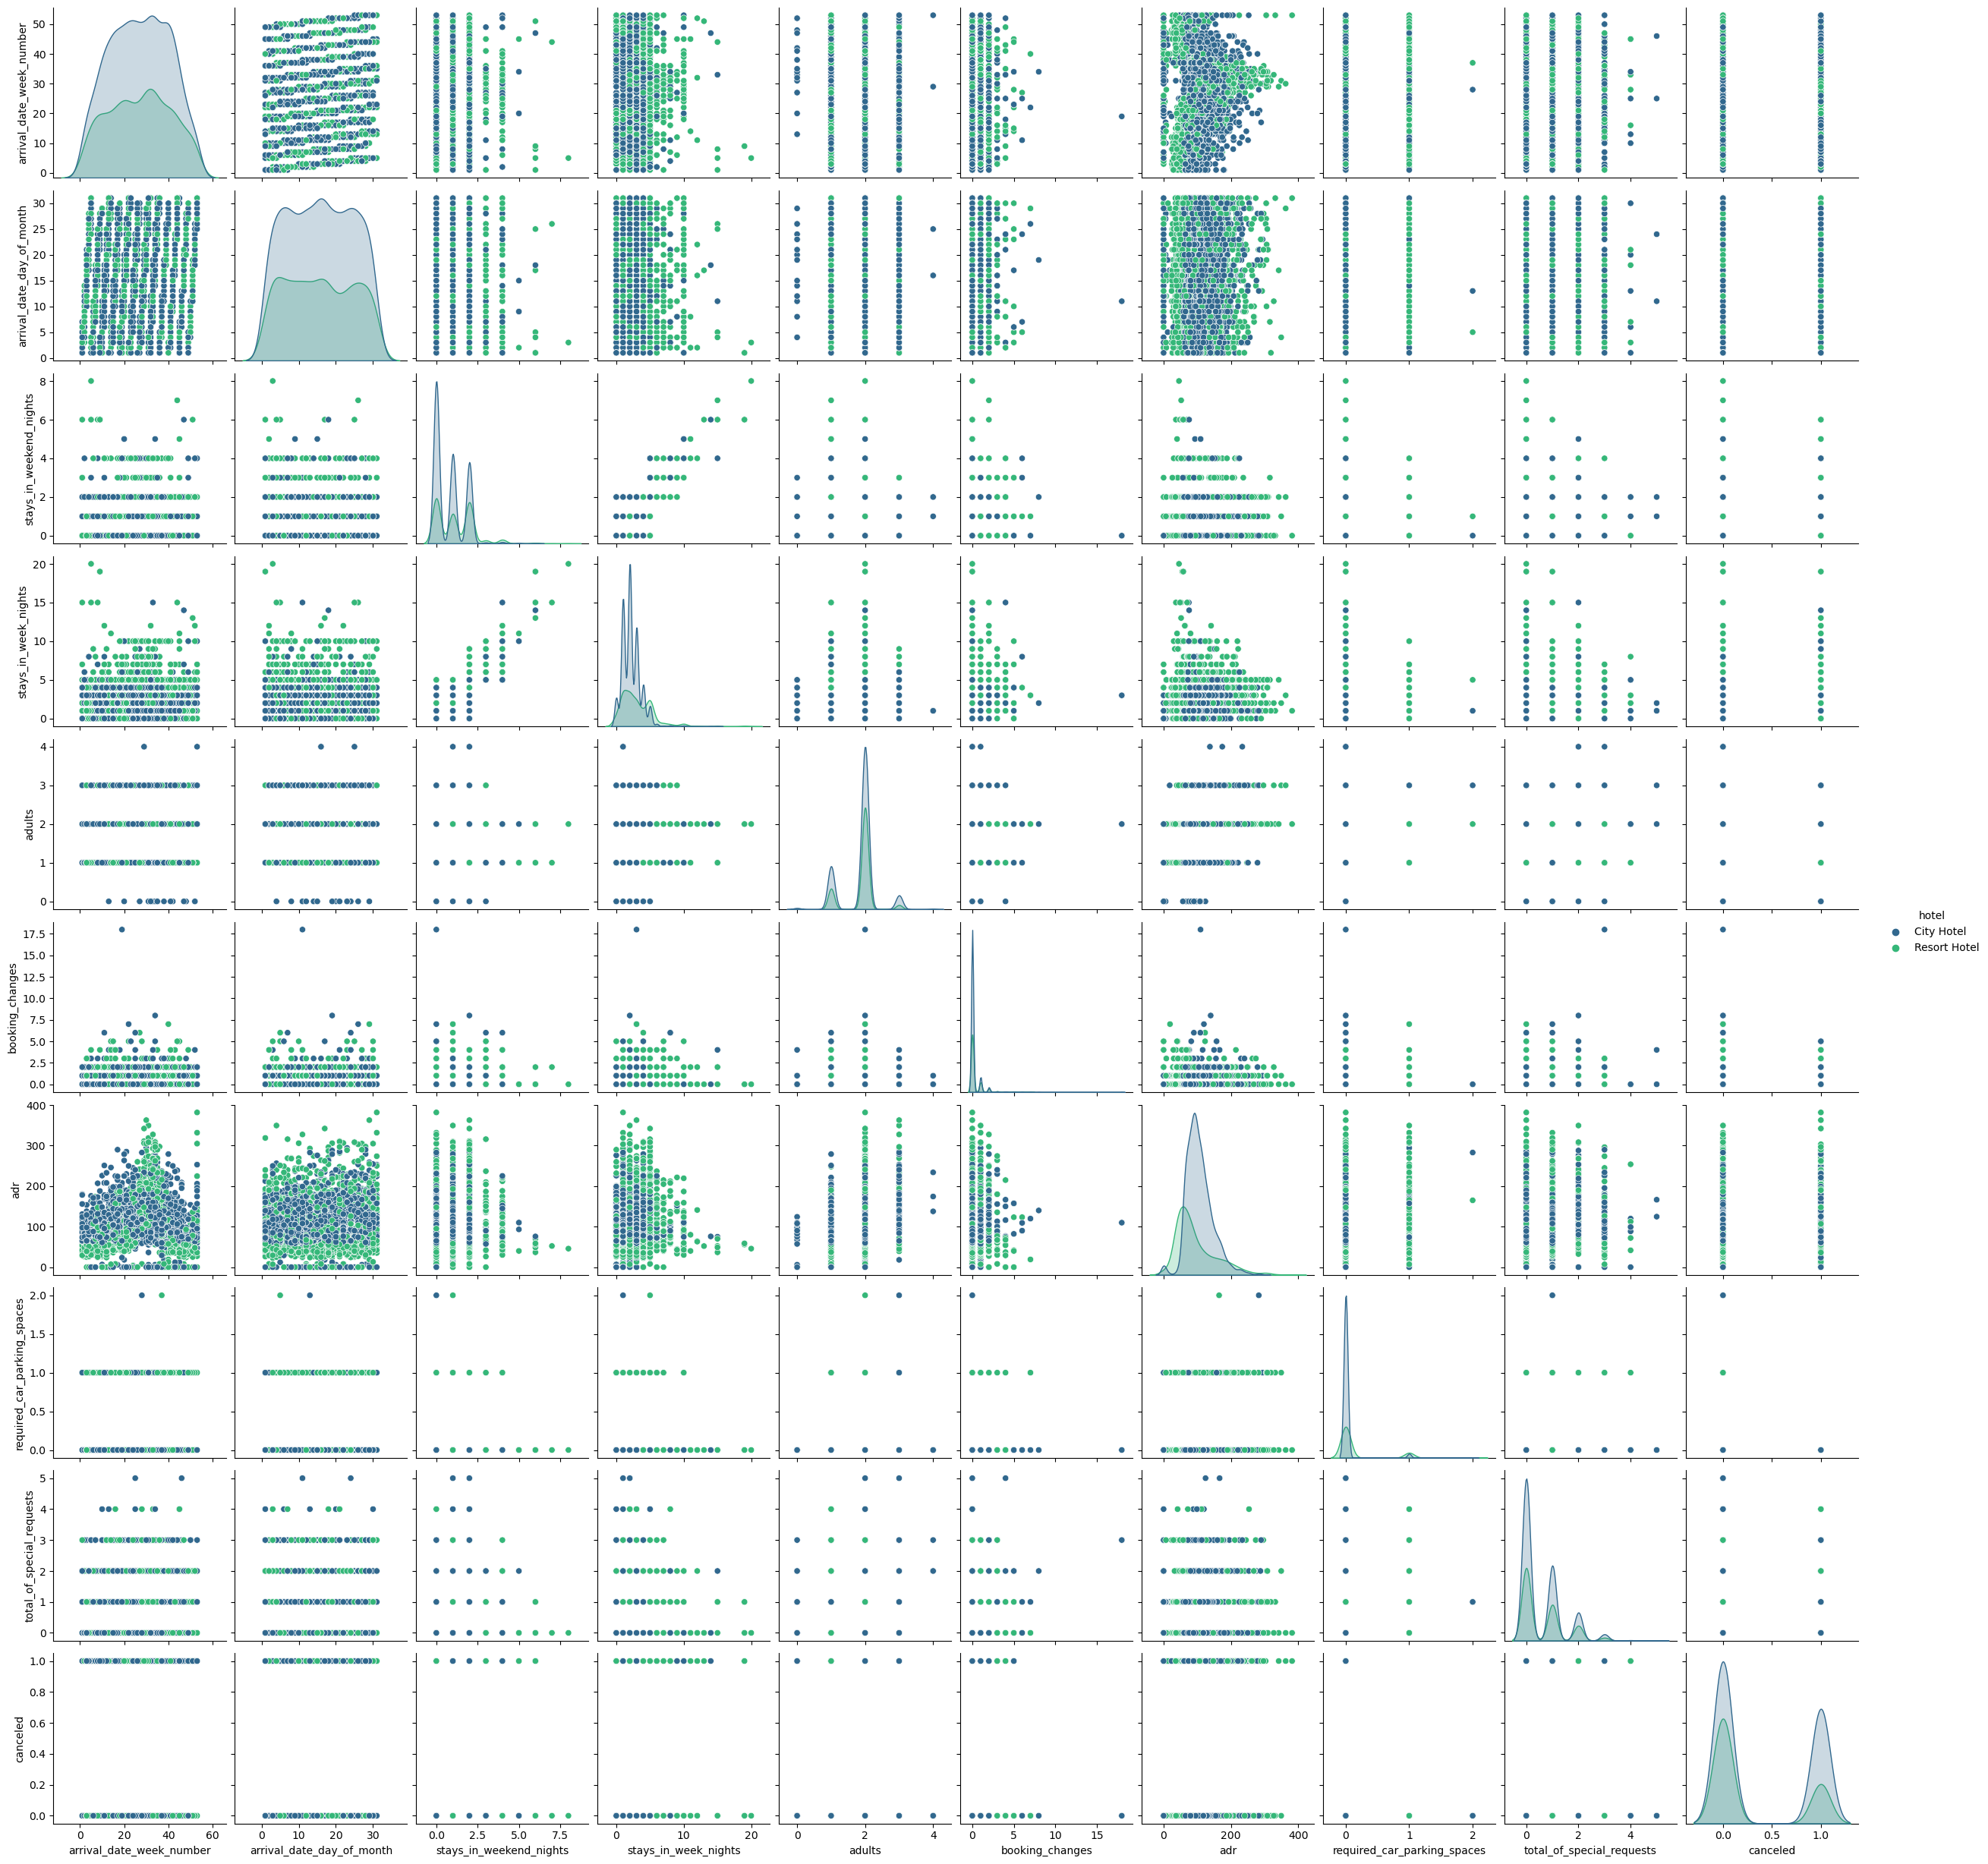

In [13]:
#Famous pairplot function that allows to see all pattern and distributions between numerical data
sns.pairplot(df, hue='hotel', palette='viridis')
plt.show()

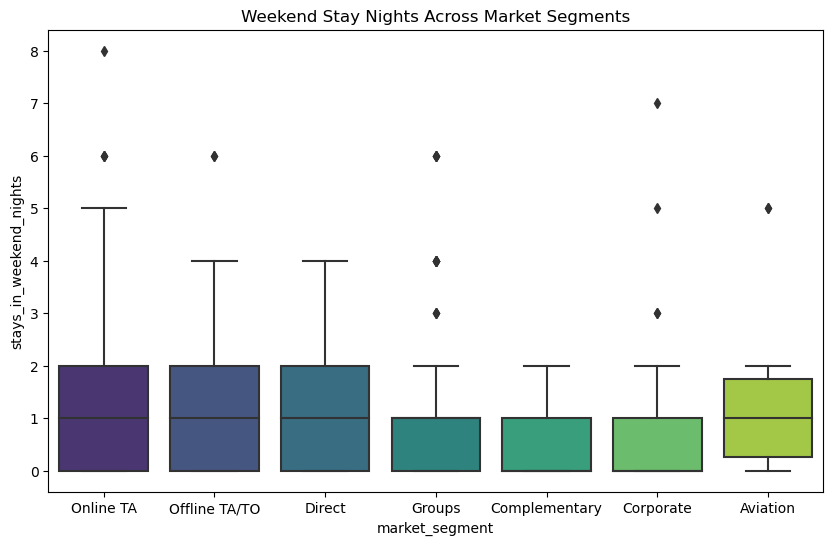

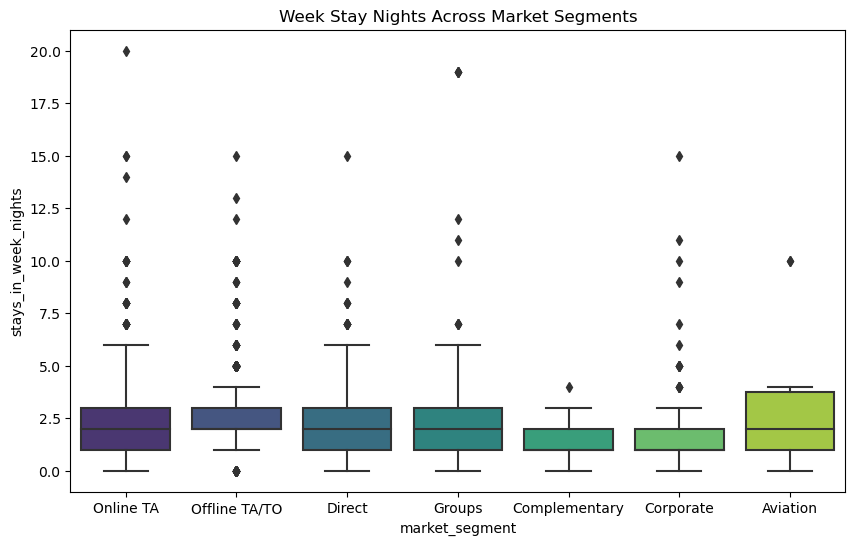

In [14]:
#Now let's do something more precise and focus on some co distribution only

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='market_segment', y='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across Market Segments")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='market_segment', y='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across Market Segments")
plt.show()


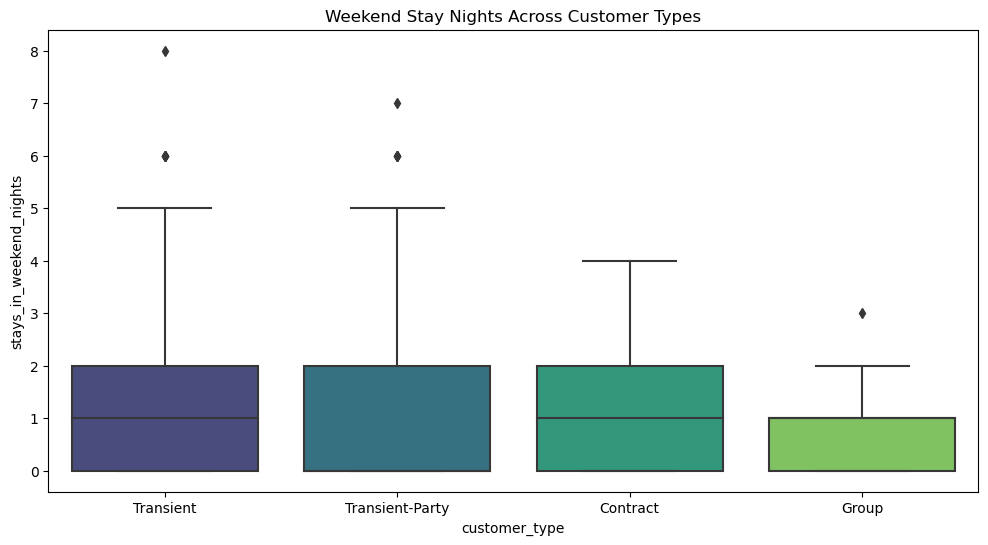

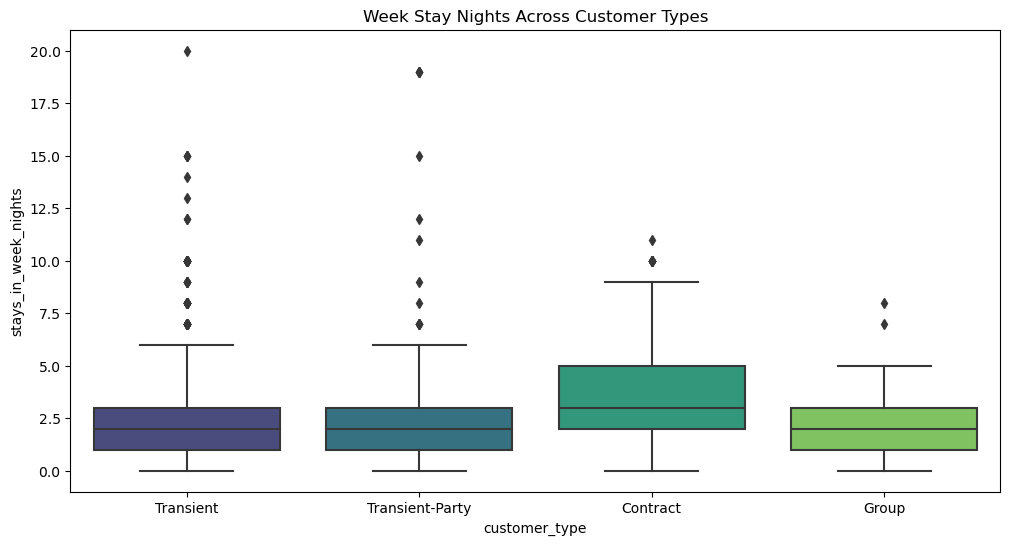

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across Customer Types")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across Customer Types")
plt.show()

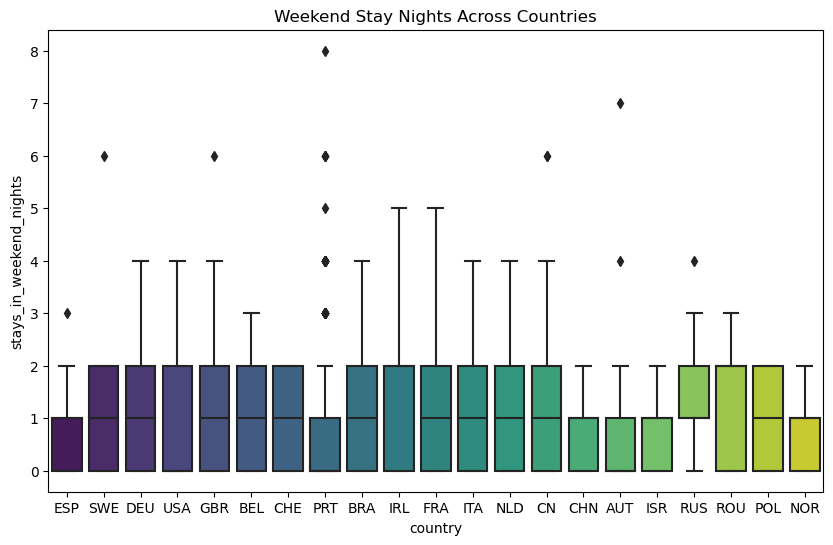

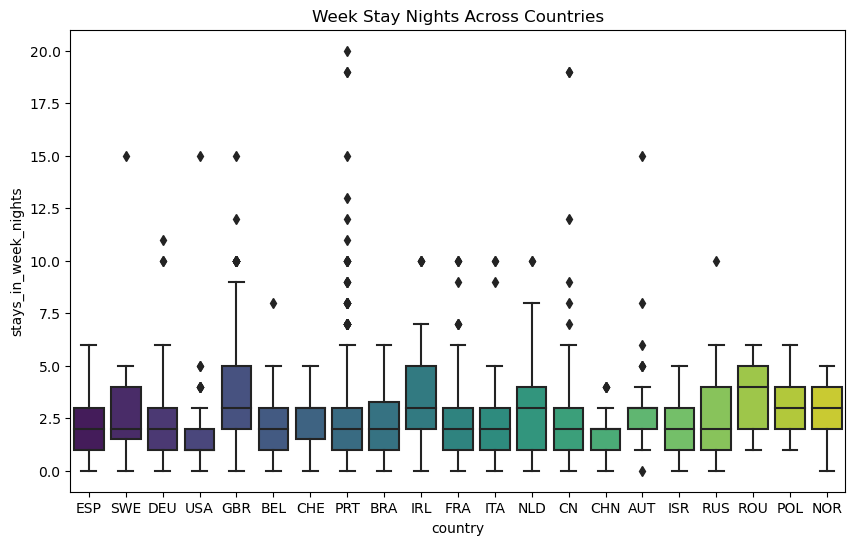

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_country, x='country', y='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across Countries")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_country, x='country', y='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across Countries")
plt.show()


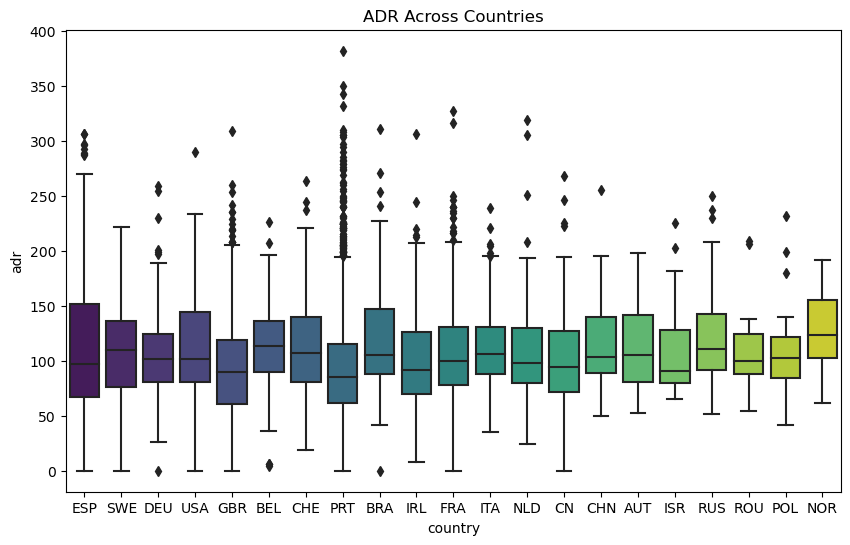

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_country, x='country', y='adr', palette='viridis')
plt.title("ADR Across Countries")
plt.show()

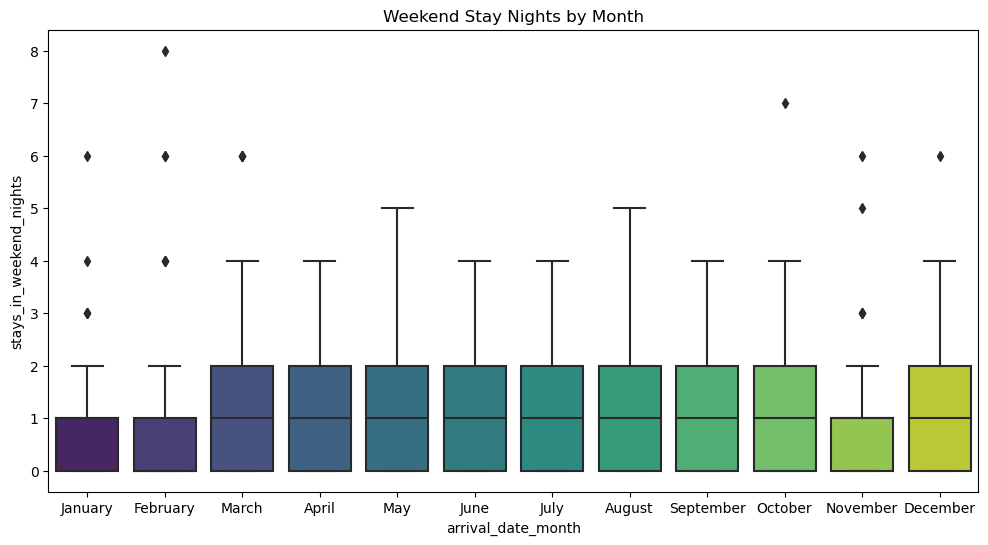

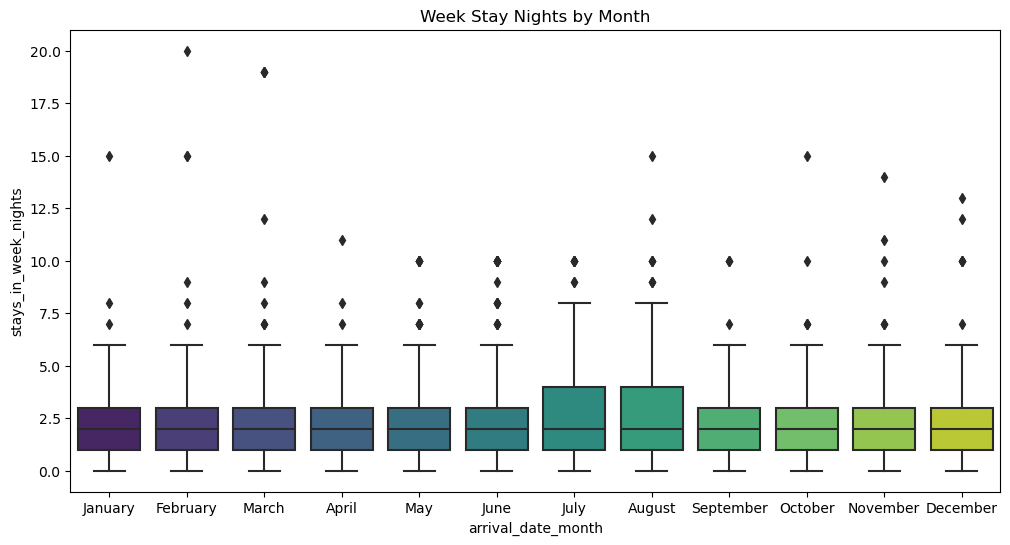

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='arrival_date_month', y='stays_in_weekend_nights', palette='viridis', order=months_order)
plt.title("Weekend Stay Nights by Month")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='arrival_date_month', y='stays_in_week_nights', palette='viridis', order=months_order)
plt.title("Week Stay Nights by Month")
plt.show()


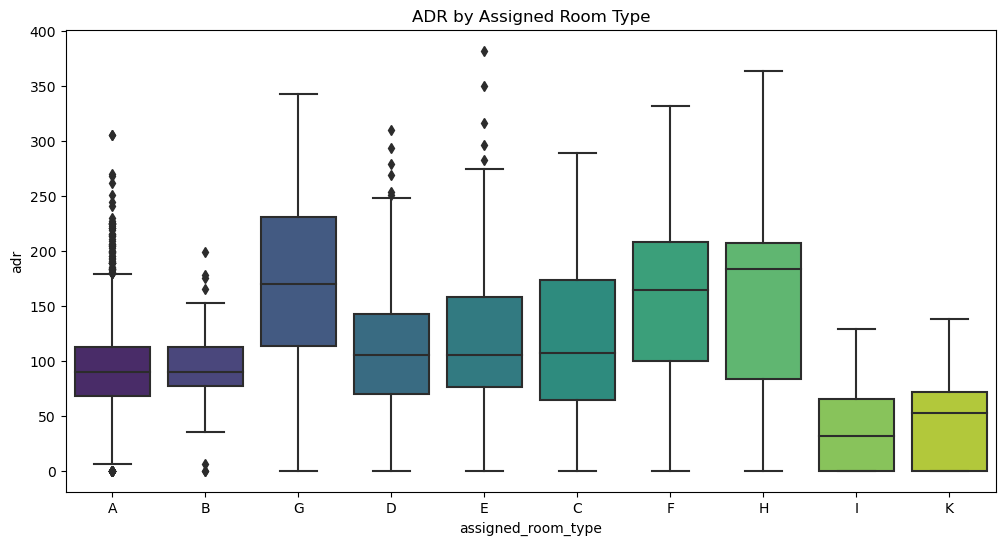

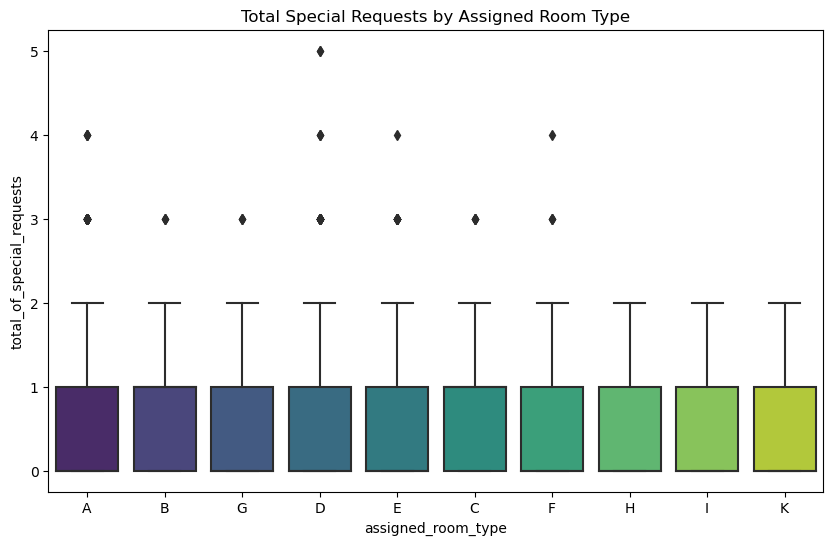

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='assigned_room_type', y='adr', palette='viridis')
plt.title("ADR by Assigned Room Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='assigned_room_type', y='total_of_special_requests', palette='viridis')
plt.title("Total Special Requests by Assigned Room Type")
plt.show()


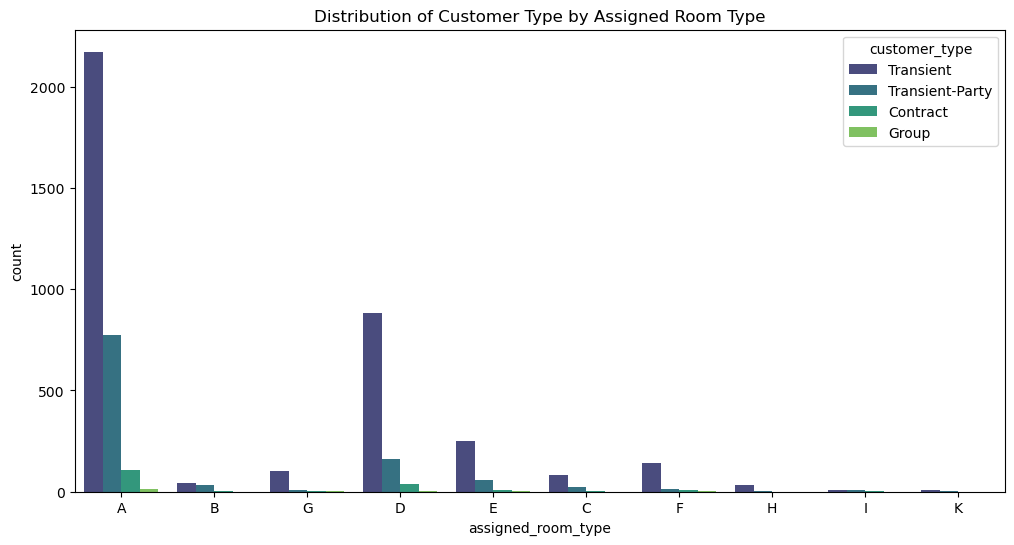

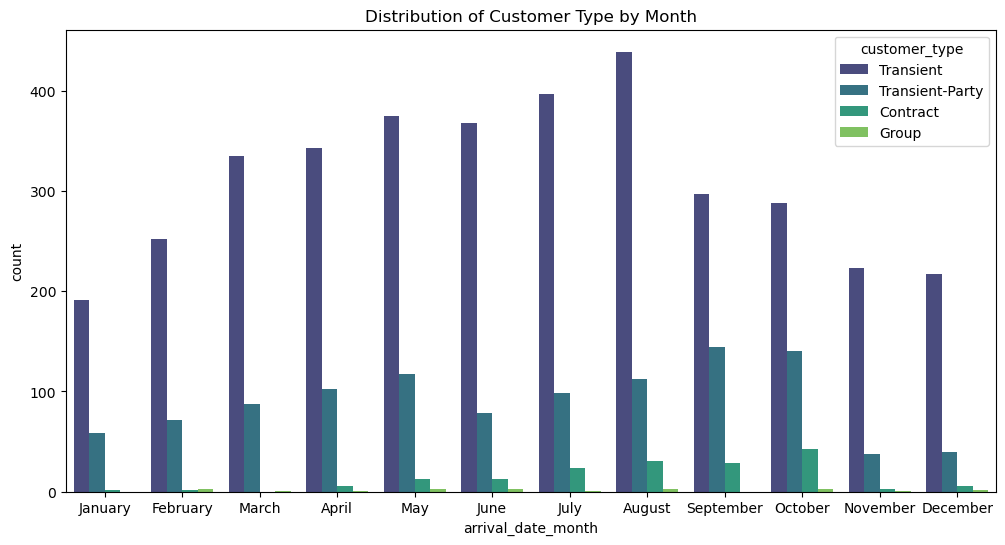

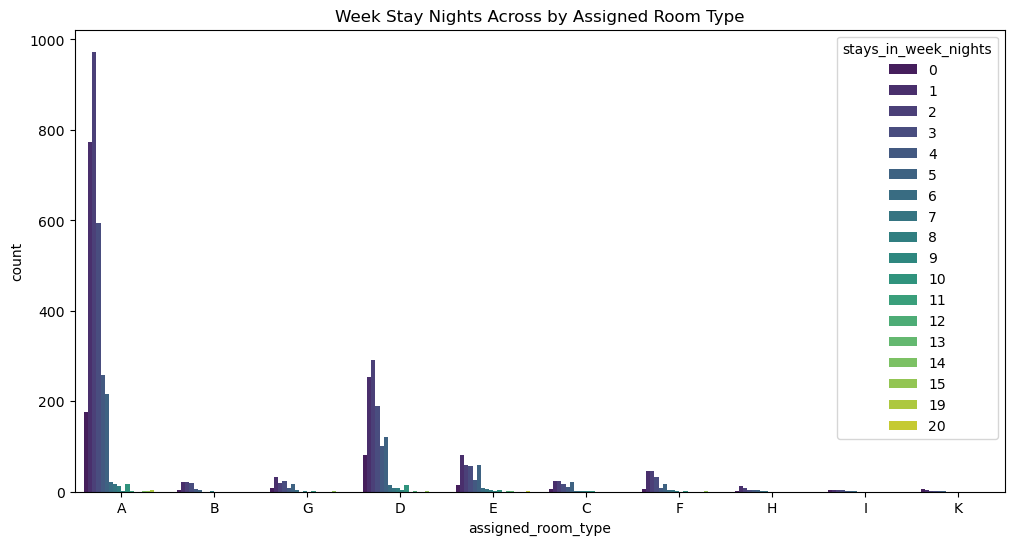

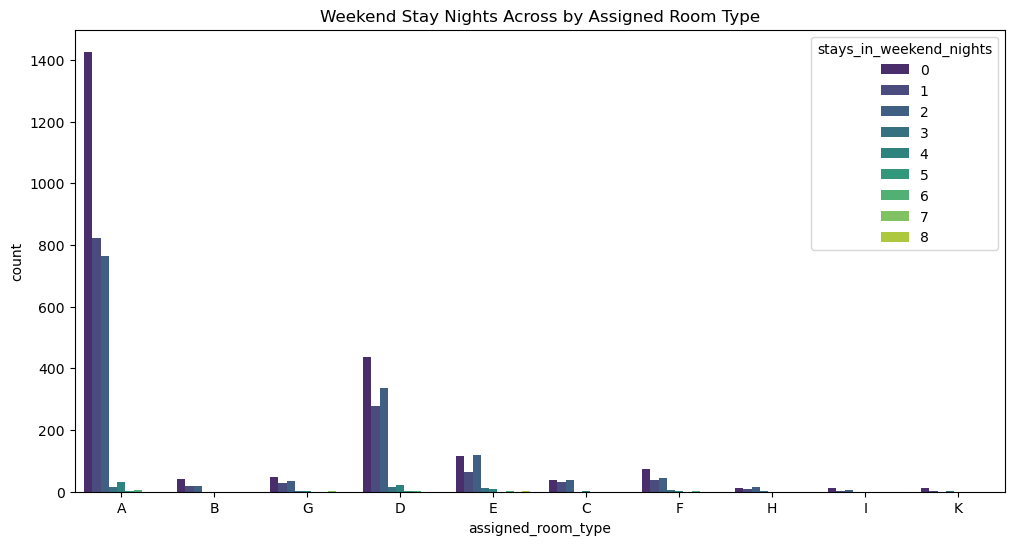

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='assigned_room_type', hue='customer_type', palette='viridis')
plt.title("Distribution of Customer Type by Assigned Room Type")
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='customer_type', palette='viridis', order=months_order)
plt.title("Distribution of Customer Type by Month")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='assigned_room_type', hue='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across by Assigned Room Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='assigned_room_type', hue='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across by Assigned Room Type")
plt.show()


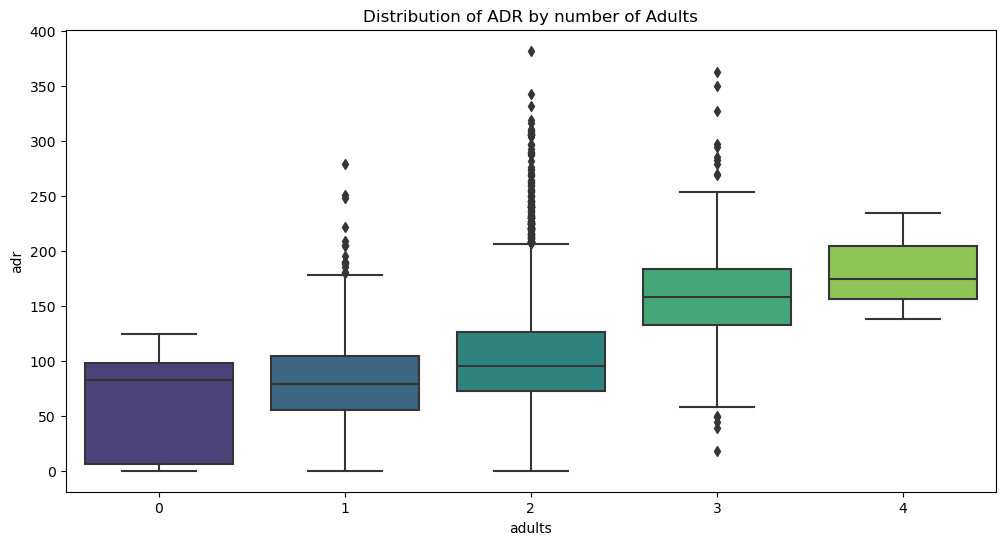

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='adults', y='adr', palette='viridis')
plt.title("Distribution of ADR by number of Adults")
plt.show()

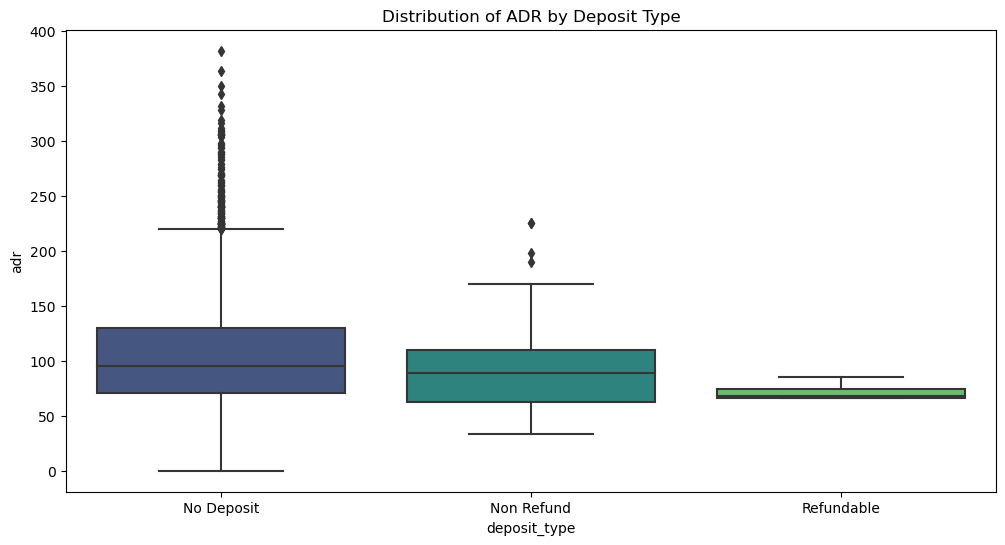

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='deposit_type', y='adr', palette='viridis')
plt.title("Distribution of ADR by Deposit Type")
plt.show()

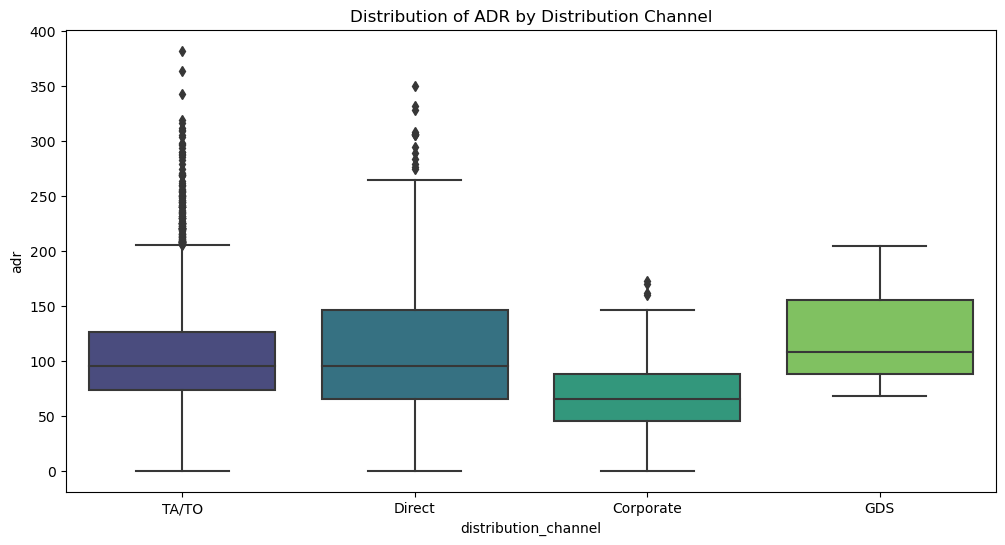

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='distribution_channel', y='adr', palette='viridis')
plt.title("Distribution of ADR by Distribution Channel")
plt.show()

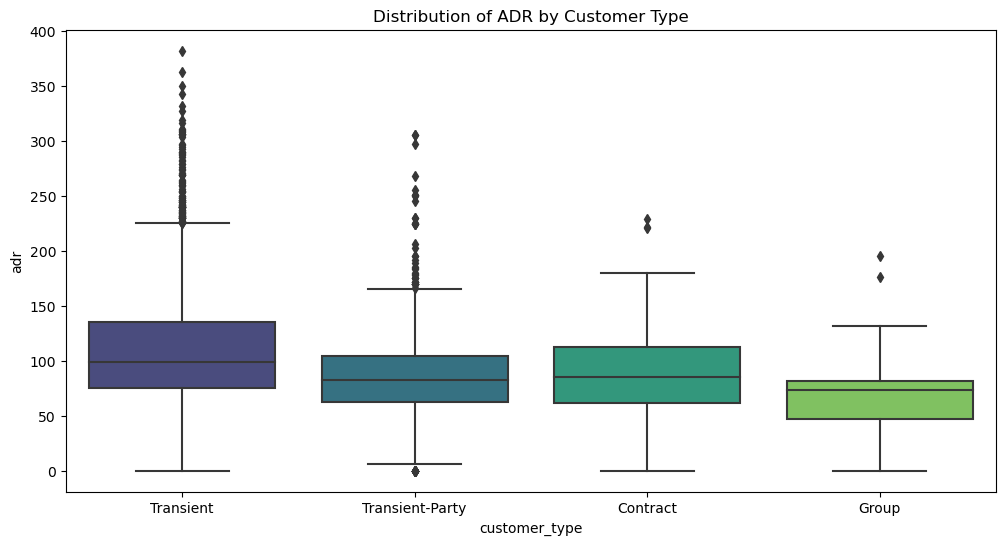

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='adr', palette='viridis')
plt.title("Distribution of ADR by Customer Type")
plt.show()

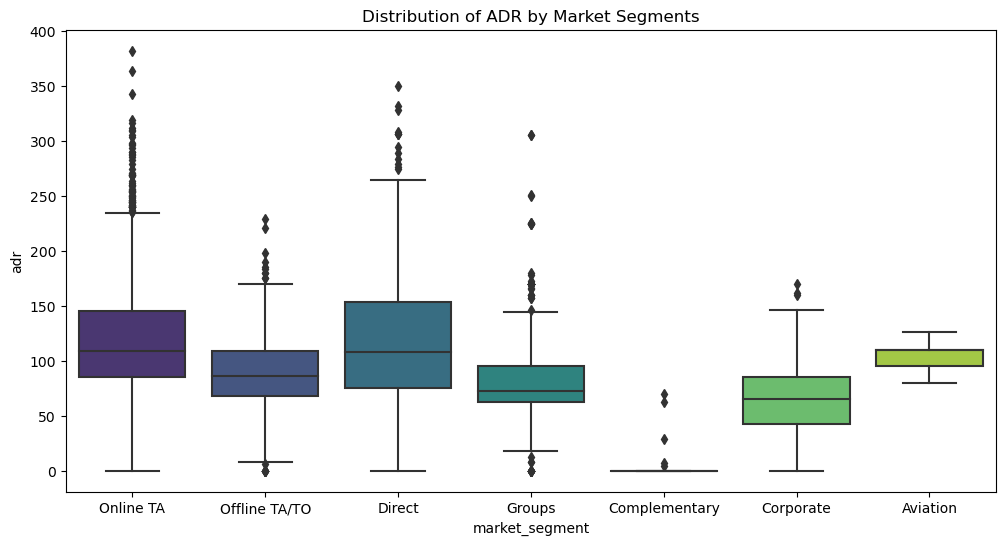

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment', y='adr', palette='viridis')
plt.title("Distribution of ADR by Market Segments")
plt.show()

### Most associated variable to cancellation

In [26]:
# Now, to do a good analysis, we need to encode categorical data
df_encoded = pd.get_dummies(df, drop_first=True)  
df_encoded.head()


,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,canceled,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,9,21,1,0,2,0,91.0,0,1,1,...,False,False,False,False,False,False,False,False,True,False
1,29,17,1,0,2,0,140.0,0,2,1,...,False,False,False,False,False,False,False,False,True,False
2,29,22,1,1,2,0,122.4,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,11,9,0,3,2,0,77.5,0,2,1,...,False,False,False,False,False,False,False,False,True,False
4,38,11,1,0,2,0,89.0,0,2,0,...,False,False,False,False,False,False,False,False,True,False


In [27]:
# Find correlations
correlations = df_encoded.corr()['canceled'].sort_values(ascending=False)

print(correlations.head(10))  # Most correlated covariates
print(correlations.tail(10))  # Less correlated covariates

canceled                      1.000000
deposit_type_Non Refund       0.484302
country_PRT                   0.346379
market_segment_Groups         0.193502
distribution_channel_TA/TO    0.187988
customer_type_Transient       0.152129
adr                           0.073442
adults                        0.062954
meal_FB                       0.053118
arrival_date_month_July       0.047757
Name: canceled, dtype: float64
country_FRA                     -0.111628
country_GBR                     -0.114252
assigned_room_type_D            -0.122504
hotel_Resort Hotel              -0.139643
customer_type_Transient-Party   -0.148748
booking_changes                 -0.151065
distribution_channel_Direct     -0.164279
market_segment_Direct           -0.170372
required_car_parking_spaces     -0.198682
total_of_special_requests       -0.213235
Name: canceled, dtype: float64


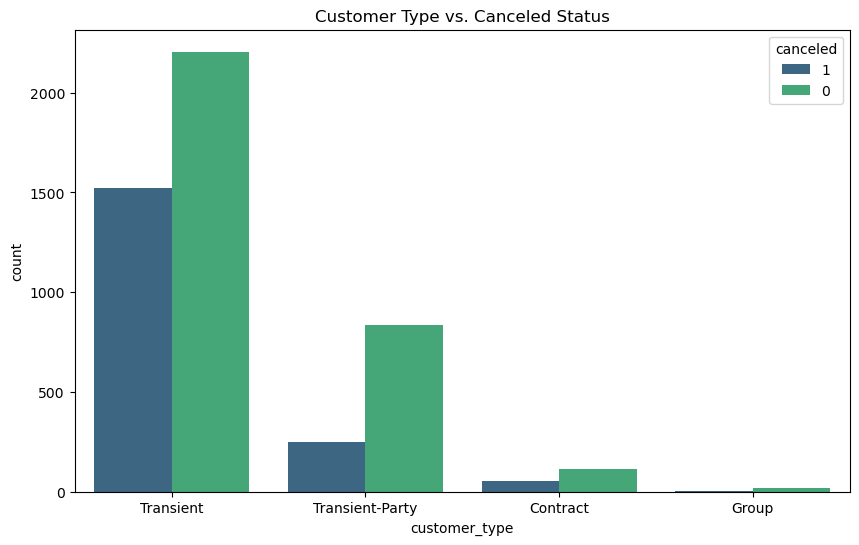

In [28]:
df['canceled'] = df['canceled'].astype(str)


plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='canceled', data=df, palette='viridis')
plt.title("Customer Type vs. Canceled Status")
plt.show()


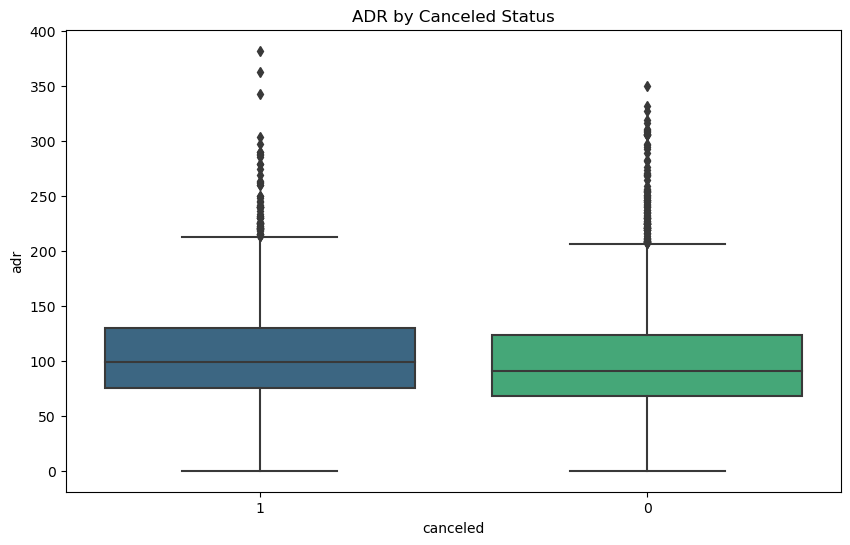

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='canceled', y='adr', data=df, palette='viridis')
plt.title("ADR by Canceled Status")
plt.show()


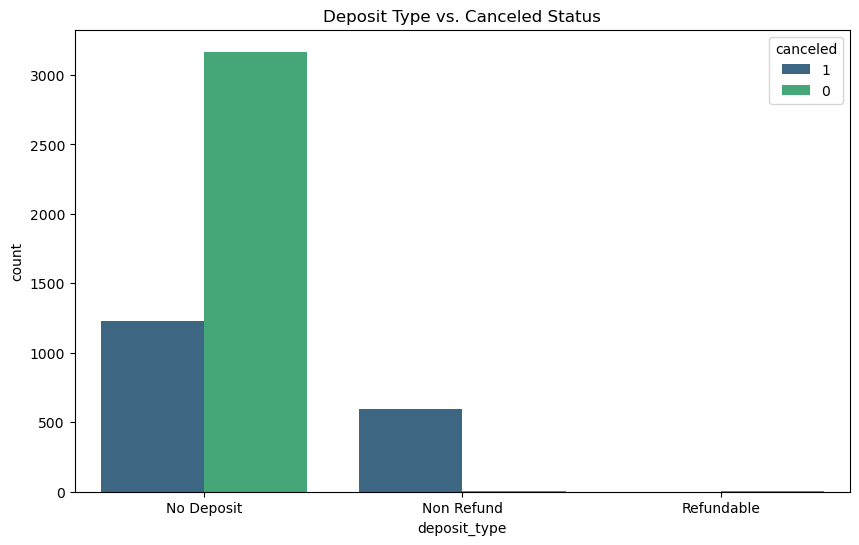

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', hue='canceled', data=df, palette='viridis')
plt.title("Deposit Type vs. Canceled Status")
plt.show()

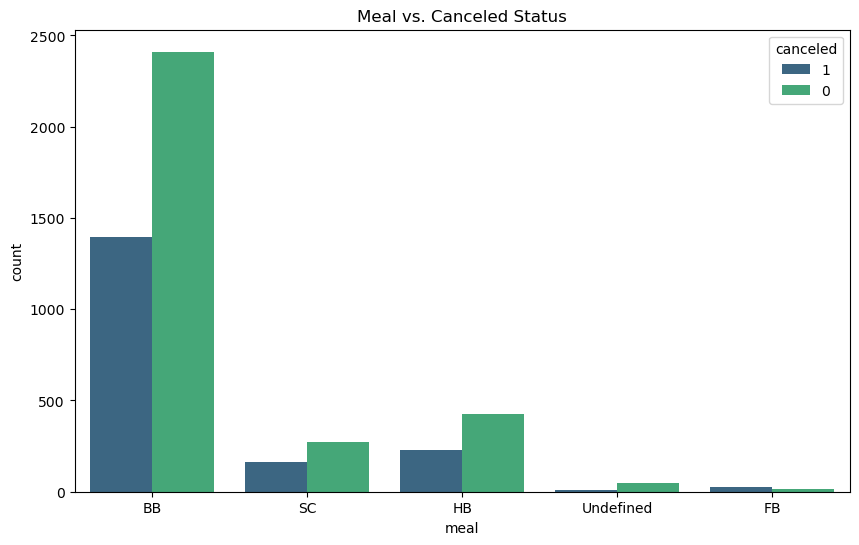

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', hue='canceled', data=df, palette='viridis')
plt.title("Meal vs. Canceled Status")
plt.show()

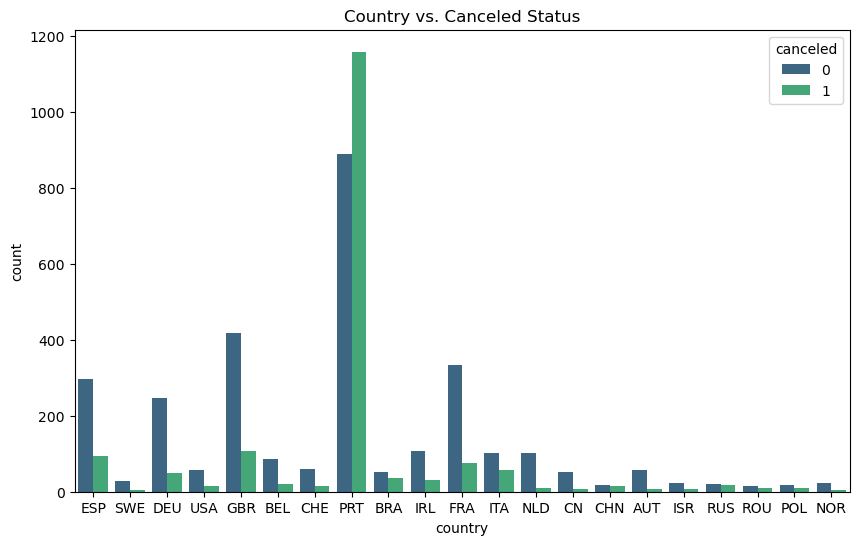

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='canceled', data=filtered_country, palette='viridis')
plt.title("Country vs. Canceled Status")
plt.show()

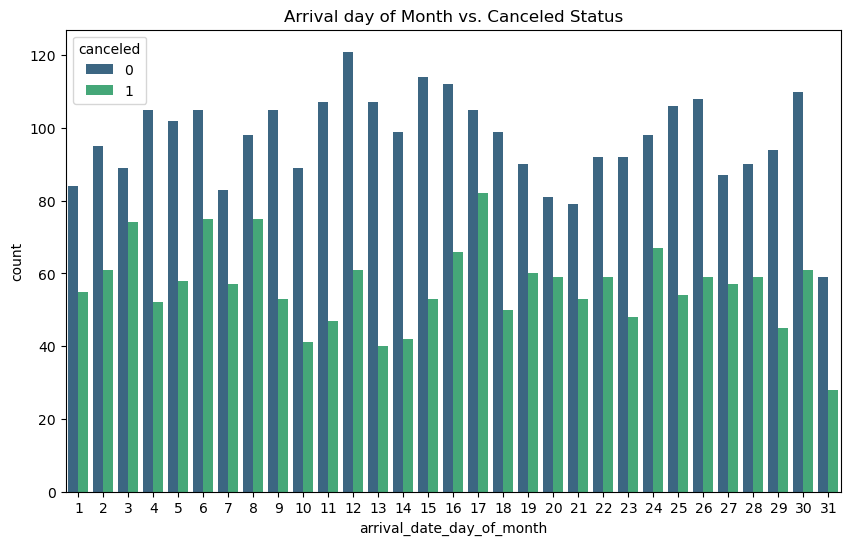

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_day_of_month', hue='canceled', data=filtered_country, palette='viridis')
plt.title("Arrival day of Month vs. Canceled Status")
plt.show()

In [35]:
import scipy.stats as statss

contingency_table = pd.crosstab(filtered_country['arrival_date_day_of_month'], filtered_country['canceled'])

chi2, p_value, dof, expected = statss.chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p_value)

Chi2 Statistic: 42.501603923961476
p-value: 0.0647873086092341


### Model prediction

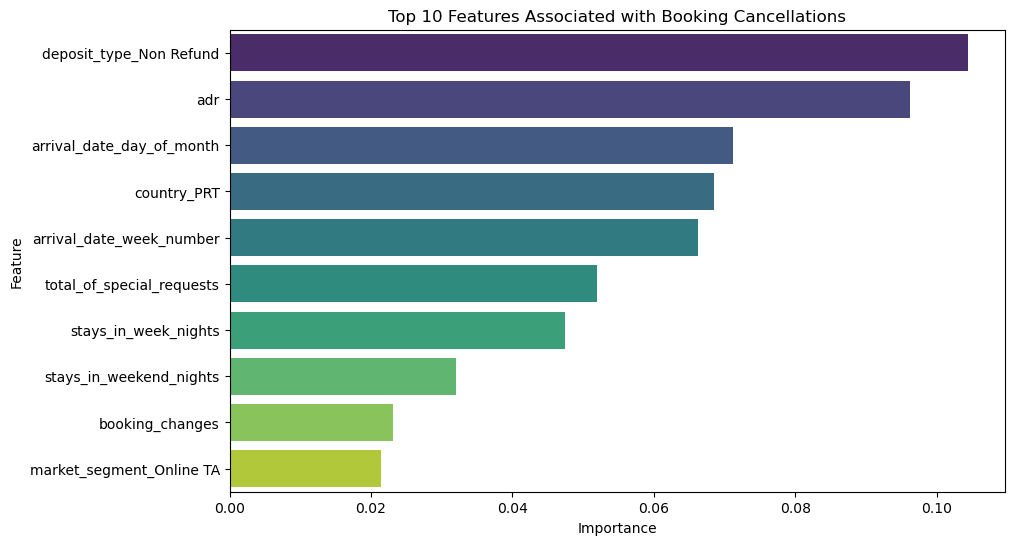

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Préparation des données
X = df_encoded.drop(columns=['canceled'])
y = df_encoded['canceled']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance des variables
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Afficher les 10 variables les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features Associated with Booking Cancellations")
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

# scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.83
Precision: 0.83
Recall: 0.66


In [ ]:
# ML model without weird data

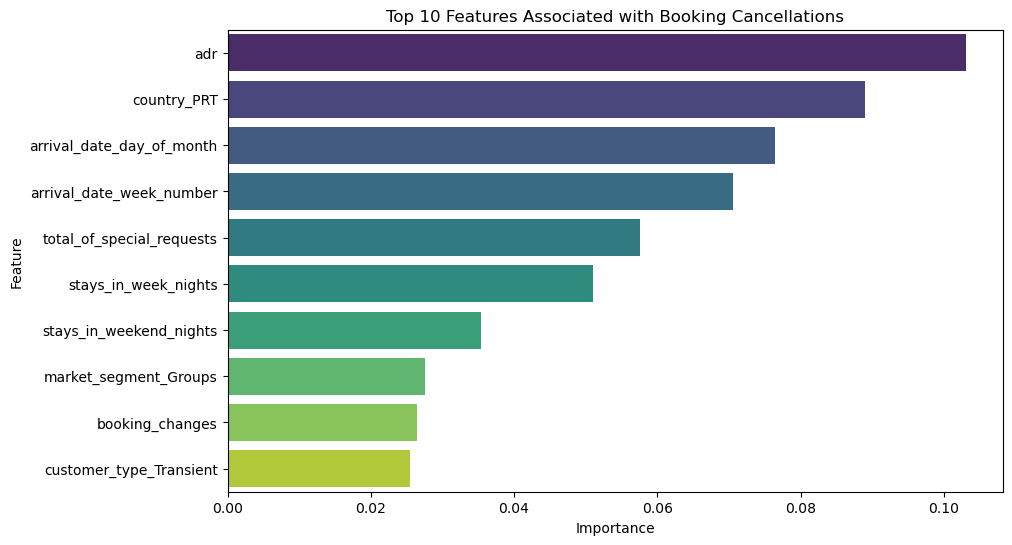

In [38]:
df_clean = df_encoded.drop(columns=['deposit_type_Non Refund'])

X = df_clean.drop(columns=['canceled'])
y = df_clean['canceled']

# split samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features Associated with Booking Cancellations")
plt.show()


In [39]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.83
Precision: 0.81
Recall: 0.66
